In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Imports OK ✅")

Imports OK ✅


## Co robi ta komórka?

- Importuje `numpy` i `matplotlib` oraz kluczowe klasy z TopFarm2.
- Służy jako szybki test środowiska (czy biblioteki są dostępne i importy działają).

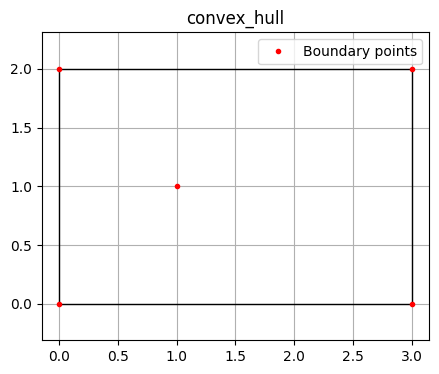

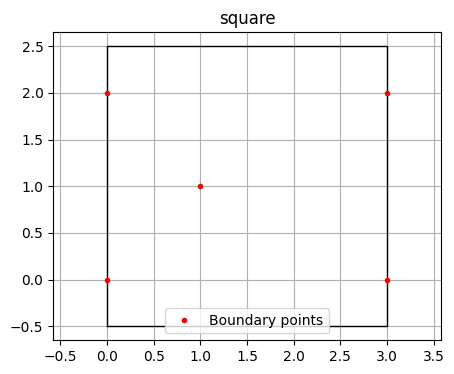

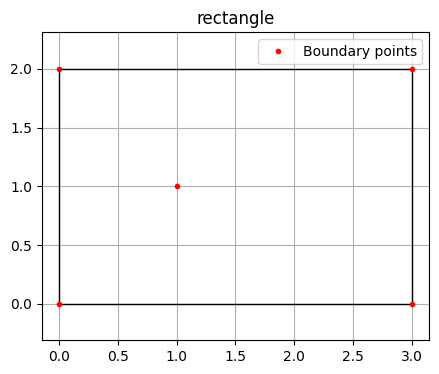

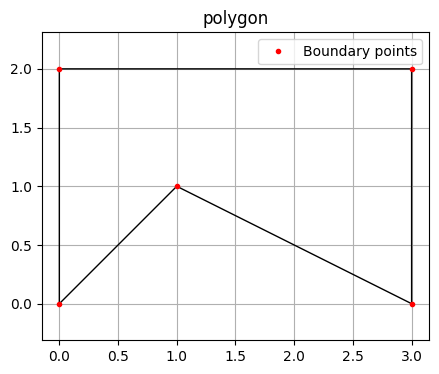

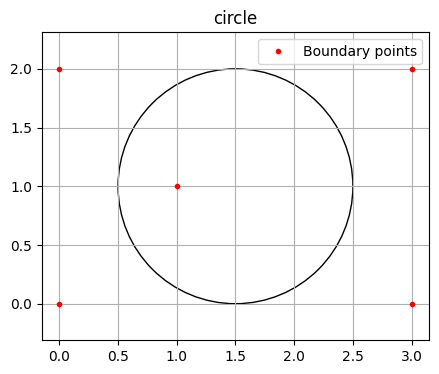

In [3]:
# 1) Punkty granicy (współrzędne w "umownych" jednostkach)
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

# 2) “Sztuczne” turbiny (tylko do rysowania)
x = [0.5, 1.5]
y = [0.5, 1.5]

# 3) Dummy koszt: nie optymalizujemy jeszcze AEP, tylko potrzebujemy obiektu problemu
dummy_cost = CostModelComponent(
    input_keys=[],
    n_wt=2,
    cost_function=lambda: 1
)

def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], '.r', label='Boundary points')
    plt.axis("equal")
    plt.grid(True)
    plt.legend()

# 4) Różne typy granicy (to jest “wow” wizualizacji)
plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))
plot_boundary('square',      XYBoundaryConstraint(boundary, 'square'))
plot_boundary('rectangle',   XYBoundaryConstraint(boundary, 'rectangle'))
plot_boundary('polygon',     XYBoundaryConstraint(boundary, 'polygon'))
plot_boundary('circle',      CircleBoundaryConstraint((1.5, 1), 1))

## Co robi ta komórka?

- Definiuje punkty granicy (wielokąt) oraz przykładowe pozycje turbin tylko do wizualizacji.
- Tworzy „dummy” model kosztu, żeby dało się zbudować obiekt `TopFarmProblem` bez prawdziwej funkcji AEP.
- Definiuje funkcję `plot_boundary(...)` i porównuje różne typy granic (`convex_hull`, `square`, `rectangle`, `polygon`, `circle`) na wykresie.

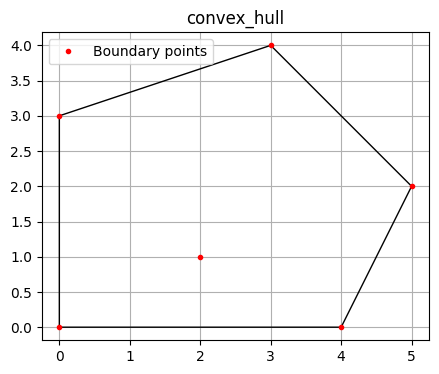

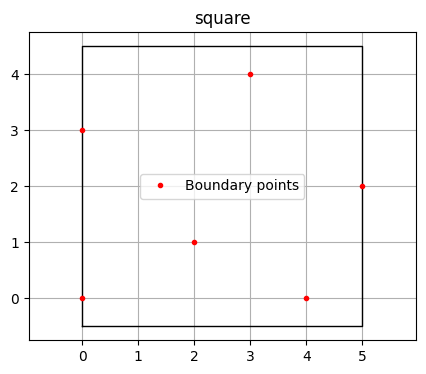

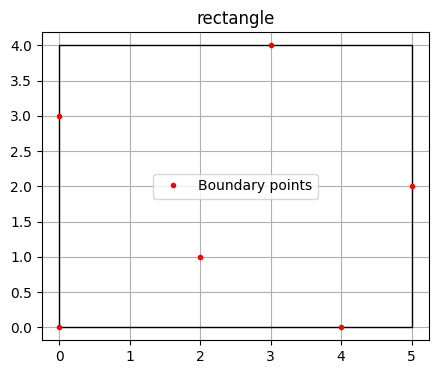

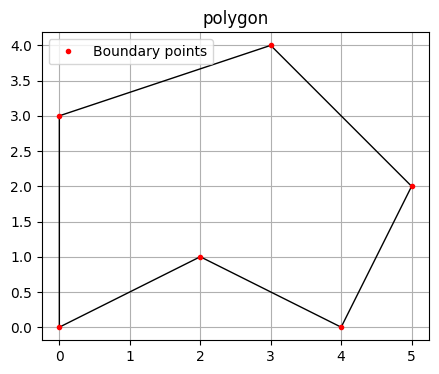

In [4]:
boundary = np.array([
    (0, 0),
    (2, 1),
    (4, 0),
    (5, 2),
    (3, 4),
    (0, 3)
])

for boundary_type in ['convex_hull', 'square', 'rectangle', 'polygon']:
    plot_boundary(boundary_type, XYBoundaryConstraint(boundary, boundary_type))

## Co robi ta komórka?

- Ustawia nowy zestaw punktów granicy (inny kształt wielokąta).
- W pętli rysuje i porównuje, jak wygląda granica dla kilku trybów `XYBoundaryConstraint`.
- To jest szybki „przegląd” typów granic na jednym przykładzie.

## Krok 4

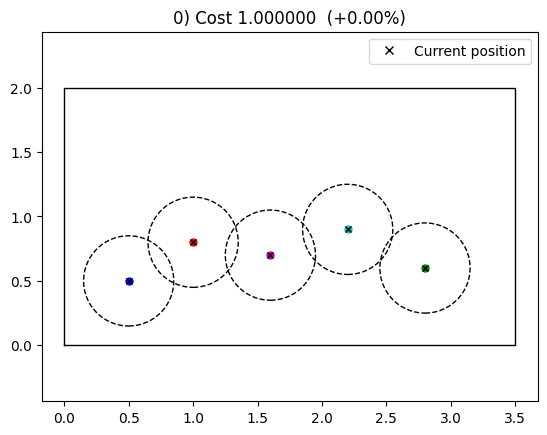

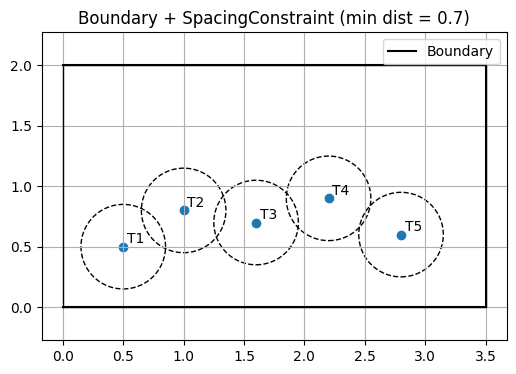

In [5]:
# Układ 5 turbin (na start celowo dość blisko)
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])

# Duża prostokątna granica, żeby “nie przeszkadzała”
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

spacing = 0.7  # <- spróbujcie 0.4 / 0.7 / 1.0 i zobaczcie różnicę
tf = TopFarmProblem(
    design_vars={'x': x5, 'y': y5},
    cost_comp=dummy_cost5,
    constraints=[
        XYBoundaryConstraint(boundary_big, 'polygon'),
        SpacingConstraint(spacing)
    ],
    plot_comp=XYPlotComp()
)

tf.setup()
tf.evaluate()

plt.figure(figsize=(6, 4))
plt.title(f"Boundary + SpacingConstraint (min dist = {spacing})")
tf.plot_comp.plot_constraints()
plt.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', label='Boundary')
plt.scatter(x5, y5)
for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
    plt.text(xx + 0.03, yy + 0.03, f"T{i}")
plt.axis("equal")
plt.grid(True)
plt.legend()

## Co robi ta komórka?

- Definiuje startowy układ 5 turbin oraz dużą prostokątną granicę (żeby głównie „widzieć” wpływ odstępów).
- Dodaje ograniczenia: granica (`XYBoundaryConstraint`) + minimalna odległość między turbinami (`SpacingConstraint`).
- Wykonuje `tf.setup()` i `tf.evaluate()` przed rysowaniem ograniczeń (to inicjalizuje/wylicza dane potrzebne do `plot_constraints()`).
- Rysuje granicę, turbiny oraz okręgi/oznaczenia pokazujące działanie constraintu spacing.

## Krok 5 — VibeCoding: zrób 1 ulepszenie wizualizacji (10 min)

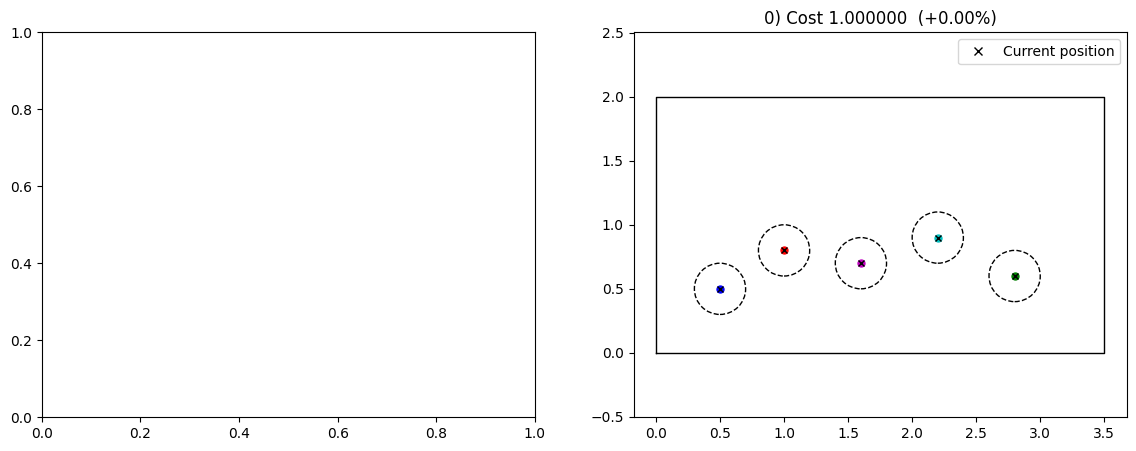

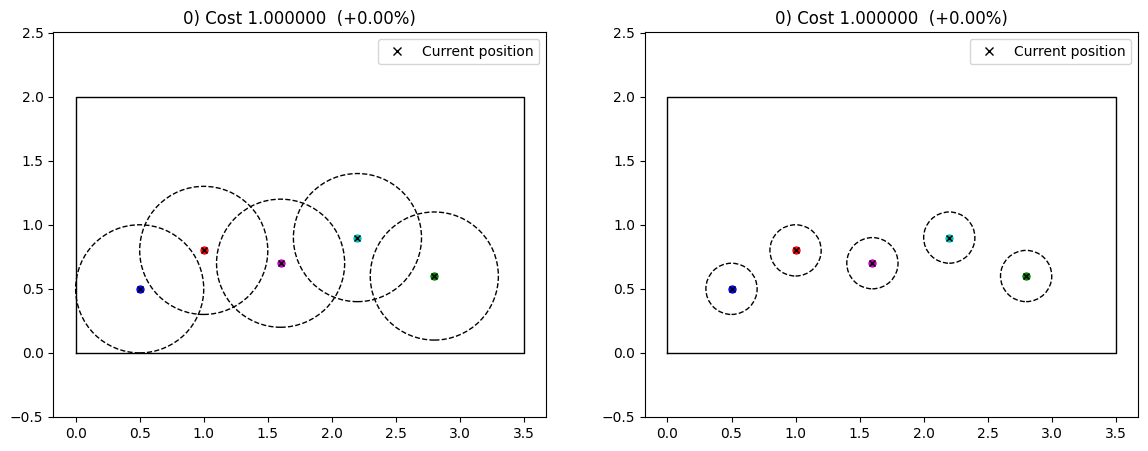

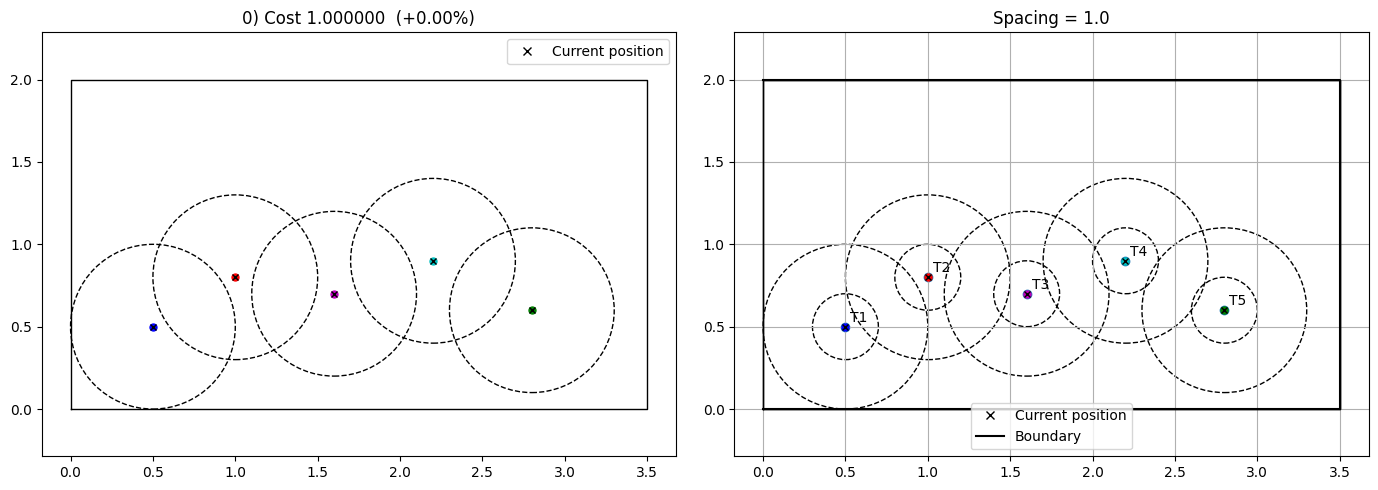

In [6]:
# Porównanie dwóch wartości spacing w jednej figurze
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Wspólne dane
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])
dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

# Lewy subplot: spacing = 0.4
spacing_left = 0.4
tf_left = TopFarmProblem(
    design_vars={'x': x5, 'y': y5},
    cost_comp=dummy_cost5,
    constraints=[
        XYBoundaryConstraint(boundary_big, 'polygon'),
        SpacingConstraint(spacing_left)
    ],
    plot_comp=XYPlotComp()
)
tf_left.setup()
tf_left.evaluate()

plt.sca(ax1)
ax1.set_title(f"Spacing = {spacing_left}")
tf_left.plot_comp.plot_constraints()
ax1.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', label='Boundary')
ax1.scatter(x5, y5)
for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
    ax1.text(xx + 0.03, yy + 0.03, f"T{i}")
ax1.axis("equal")
ax1.grid(True)
ax1.legend()

# Prawy subplot: spacing = 1.0
spacing_right = 1.0
tf_right = TopFarmProblem(
    design_vars={'x': x5, 'y': y5},
    cost_comp=dummy_cost5,
    constraints=[
        XYBoundaryConstraint(boundary_big, 'polygon'),
        SpacingConstraint(spacing_right)
    ],
    plot_comp=XYPlotComp()
)
tf_right.setup()
tf_right.evaluate()

plt.sca(ax2)
ax2.set_title(f"Spacing = {spacing_right}")
tf_right.plot_comp.plot_constraints()
ax2.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', label='Boundary')
ax2.scatter(x5, y5)
for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
    ax2.text(xx + 0.03, yy + 0.03, f"T{i}")
ax2.axis("equal")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## Co ulepszyliśmy?

**Ulepszenie wizualizacji:**
- Zamiast pojedynczego wykresu z jedną wartością `spacing`, stworzyliśmy **porównanie równoległe** (side-by-side) dwóch scenariuszy w jednej figurze.
- Lewy subplot pokazuje `spacing = 0.4` (mniejsza minimalna odległość), prawy `spacing = 1.0` (większa minimalna odległość).

**Efekt na wykresie:**
- **Spacing = 0.4**: Okręgi wokół turbin są małe, turbiny mogą stać bliżej siebie. Widać, że niektóre okręgi się nachodzą lub są bardzo blisko — to oznacza, że ograniczenie spacing jest *naruszone* lub *na granicy*.
- **Spacing = 1.0**: Okręgi są znacznie większe, co wymusza większe odstępy między turbinami. W tym przypadku łatwiej zauważyć potencjalne konflikty w gęstym układzie.

**Perspektywa projektowania farmy wiatrowej:**
- **Spacing (minimalna odległość)** to kluczowy parametr w projektowaniu farm wiatrowych — większe odstępy zmniejszają efekt śladu (wake effect), ale jednocześnie wymagają więcej terenu.
- Zbyt małe `spacing` może prowadzić do konfliktów z zasadami bezpieczeństwa lub ograniczeń technicznych (np. transport łopat, konserwacja).
- Porównanie dwóch wartości spacing pomaga zrozumieć **trade-off** między gęstością rozmieszczenia turbin a wymaganiami odstępów, co jest istotne przy optymalizacji układu farm.